# Project - Exploring Ford GoBike System Data
## by Swathi Munikoti

- [Introduction of Ford GoBike data](#introduction)

- [Preliminary wrangling](#wrangling)

- [Assessing Data](#assessing)

- [Cleaning data](#cleaning)

- [Univariate Exploration](#univariate)

- [Bivariate Exploration](#bivariate)

- [Multivariate Exploration](#multivariate)

- [Conclusions](#conclusions)

- [References](#references)


### Introduction of Ford GoBike data <a name="introduction"></a>

> As my device has system limitations, I chose this dataset as it occupied 38.5 MB in memory. I downloaded the given excel file, 201902-fordgobike-tripdata.xls from Udacity project resources. This data set includes information about individual rides made in a bike-sharing system for the month February 2019.

### Preliminary Wrangling <a name="wrangling"></a>

> The data set has 183412 records and 16 columns. the columns are,  Duration (seconds) , Start Time , End Time, Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer) , Member Year of Birth, Member Gender(Male, Female, Other), Bike Share For All Trip(Yes, No).

In [1021]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [1022]:
# Load the dataset and view a couple of records
bike_data = pd.read_csv("fordgobike-tripdata.csv")
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Assessing data <a name="assessing"></a>

In [1023]:
# View the details
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [1024]:
# View descriptive statistics of the dataframe
bike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [1025]:
# Check for Null values
bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [1026]:
# Check for duplicated values
bike_data.duplicated().sum()

0

In [1027]:
# list the count of values of Station_id
bike_data.start_station_id.value_counts()

58.0     3904
67.0     3544
81.0     3052
21.0     2895
3.0      2760
         ... 
301.0       9
51.0        7
300.0       4
224.0       4
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [1028]:
# list the count of values of start_station_name
bike_data.start_station_name.value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [1029]:
# list the count of values of start_station_latitude
bike_data.start_station_latitude.value_counts()

37.776619    3904
37.776639    3544
37.775880    3052
37.789625    2895
37.786375    2760
             ... 
37.776101       7
37.784855       4
37.317298       4
37.766349       2
37.380000       1
Name: start_station_latitude, Length: 334, dtype: int64

In [1030]:
# list the count of values of end_station_id
bike_data.end_station_id.value_counts()

67.0     4857
58.0     3973
21.0     3647
15.0     3368
3.0      2997
         ... 
51.0        9
300.0       7
224.0       6
344.0       6
301.0       5
Name: end_station_id, Length: 329, dtype: int64

In [1031]:
# list the count of values of bike_id
bike_data.bike_id.value_counts()

4794    191
4814    176
5014    174
4422    174
5175    173
       ... 
5647      1
3655      1
1194      1
3114      1
5891      1
Name: bike_id, Length: 4646, dtype: int64

In [1032]:
# list the count of values of user_type
bike_data.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [1033]:
# list the count of values of member_birth_year
bike_data.member_birth_year.value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1930.0        1
1910.0        1
1927.0        1
1928.0        1
1878.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [1034]:
# list the count of values of member_gender
bike_data.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [1035]:
# list the count of values of bike_share_for_all_trip
bike_data.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

### Cleaning Data <a name="cleaning"></a>
- Remove rows where start_station_id is null.
- Drop all rows where member_birth_year is null.
- Change start_time & end_time  data type to datetime.
- Convert duration_sec to minutes.
- Convert user_type & member_gender to category
- Calculate age of the members from member_birth_year
- Convert member_age & member_birth_year to int
- Extract weekday and hour of day information from start_time
- Convert  weekdays to ordinal variables

In [1036]:
# Make a copy of the original data
df = bike_data.copy()

#### Remove rows where start_station_id is null.

In [1037]:
df[df['start_station_id'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


In [1038]:
df.dropna(subset=['start_station_id'], inplace=True)

In [1039]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

#### Drop all rows where member_birth_year is null.

In [1040]:
df.dropna(subset=['member_birth_year'], inplace=True)

In [1041]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [1042]:
df.shape

(174952, 16)

#### Change start_time & end_time data type to datetime.

In [1043]:
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [1044]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

#### Convert duration_sec to minutes.

In [1045]:
# convert duration_sec to minutes
df['duration_min'] = df['duration_sec'] / 60

# convert duration_min to float
df['duration_min'] = df['duration_min'].astype(float)

# show head of df
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333


#### Convert user_type & member_gender to category

In [1046]:
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')

# check info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

#### Calculate age of the members from member_birth_year

In [1047]:
df['member_age'] = 2019 - df['member_birth_year']
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,45.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333,60.0


####  Convert member_age & member_birth_year to int

In [1048]:
df['member_age'] = df['member_age'].astype('int64')
df['member_birth_year'] = df['member_birth_year'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

#### Extract weekday and hour of day information from start_time

In [1049]:
df['weekday'] = df['start_time'].dt.strftime('%a')
df.weekday.value_counts()

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: weekday, dtype: int64

In [1050]:
df['hour_of_day'] = df.start_time.dt.strftime('%H')

# sort hour_of_day ascending
df = df.sort_values(by='hour_of_day',ascending=True)
df.hour_of_day.value_counts()

17    20904
08    20227
18    16118
09    15204
16    13473
07    10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
06     3293
22     2793
23     1572
00      893
05      866
01      525
02      355
04      227
03      164
Name: hour_of_day, dtype: int64

In [1051]:
df['start_time'].dt.strftime('%b').value_counts()


Feb    174952
Name: start_time, dtype: int64

#### Convert  weekdays to ordinal variables

In [1052]:
weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays)
df['weekday'] = df['weekday'].astype(ordered_weekdays)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 183411 to 122186
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type  

### What is the structure of your dataset?

> - The data set has 183412 records and 16 columns. The columns are,  Duration (seconds) , Start Time , End Time, Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer) , Member Year of Birth, Member Gender(Male, Female, Other), Bike Share For All Trip(Yes, No). 
> - After cleaning the data set, there are 174952 records and 20 columns.
> - I added 4 new columns - duration_min, member_age, weekday and hour_of_day.

### What is/are the main feature(s) of interest in your dataset?

> From the data set, I would like to understand
> - The percentage of subscribers and customers among riders
> - The frequency of bike rides differing with age. 
> - The demand for bikes during the day and across the week. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Member age, user type and the details derived from the start time such as weekday, hour_of_day will be vital.

### Univariate Exploration <a name="univariate"></a>

#### What is the percentage of subscribers and customers?

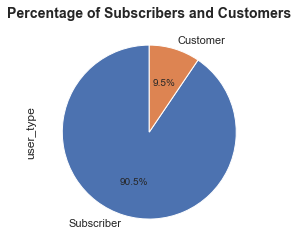

In [1053]:
# Start with user_types
df.user_type.value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%');
plt.title('Percentage of Subscribers and Customers', fontsize=14, fontweight='semibold');

#### What is the percentage of bike riders by different members?

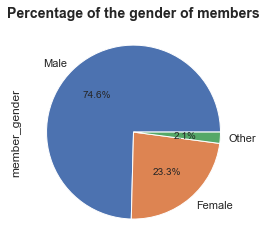

In [1054]:
df.member_gender.value_counts().plot(kind='pie', autopct='%1.1f%%');
plt.title('Percentage of the gender of members', fontsize=14, fontweight='semibold');

#### What is the frequency of rides through out the week?

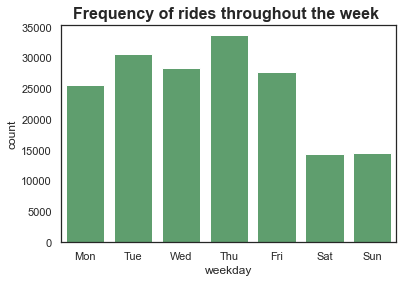

In [1055]:
sb.set_style("white")
sb.countplot(data = df, x='weekday',  color=sb.color_palette()[2]);
plt.title('Frequency of rides throughout the week ', fontsize=16, fontweight='semibold');

##### Most of the rides are on Thursday and the frequency of rides reduces during weekends.

#### What is the frequency of bike rides during the day?

In [1056]:
# Find the count of number of riders for each hour.
df1 = df.groupby('hour_of_day')['bike_id'].count().reset_index()

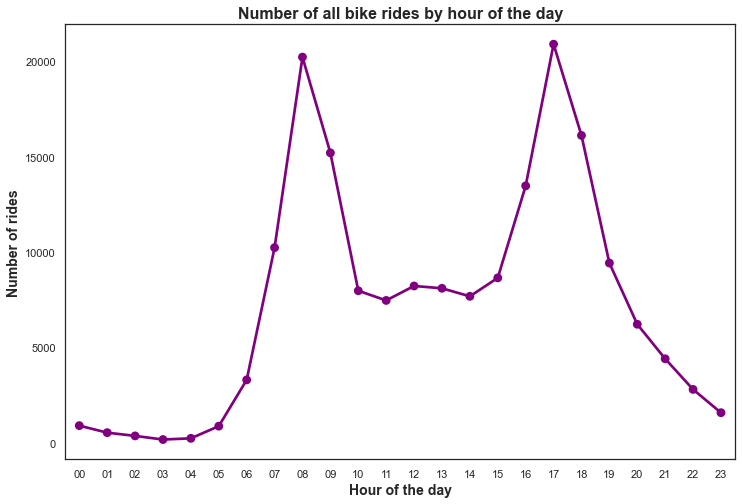

In [1057]:
plt.figure(figsize=(12,8))
sb.pointplot(x='hour_of_day', y='bike_id', color='purple', data=df1);
plt.title('Number of all bike rides by hour of the day', fontsize=16, fontweight='semibold')
plt.xlabel('Hour of the day', fontsize=14, fontweight='semibold')
plt.ylabel('Number of rides',fontsize=14, fontweight='semibold');

##### Most of the rides peak during 7-9 a.m and 4-6 p.m

#### What is the frequency of riders by age group?

In [1058]:
# considering member_age below 70
df = df[df['member_age'] <= 70]
df.shape

(174377, 20)

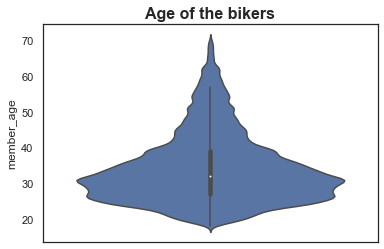

In [1059]:
# violinplot member_age
sb.violinplot(data = df, y = 'member_age', fontsize=14, fontweight='semibold');
plt.title("Age of the bikers", fontsize=16, fontweight='semibold');

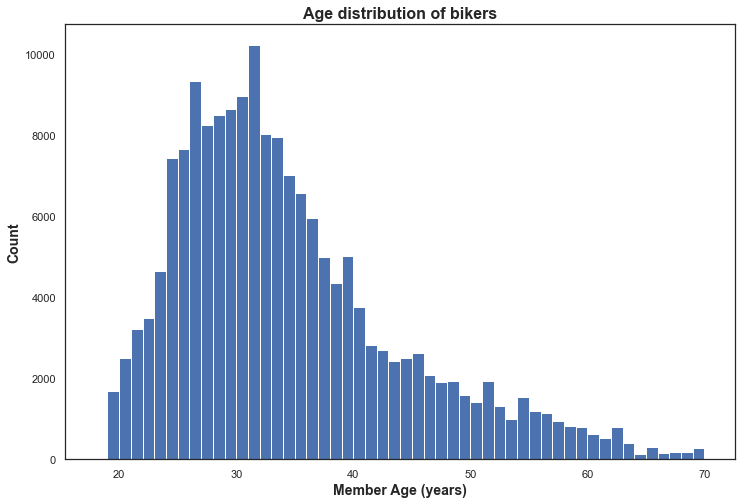

In [1060]:
binsize = 1
bins = np.arange(df.member_age.min(), df.member_age.max()+binsize, binsize)
plt.figure(figsize=(12,8))
plt.hist(data = df, x = 'member_age', bins = bins)
plt.xlabel('Member Age (years)', fontsize=14, fontweight='semibold');
plt.ylabel('Count',fontsize=14, fontweight='semibold');
plt.title('Age distribution of bikers',fontsize=16, fontweight='semibold');

##### Most of the bikers are between 25-35 years old. There are few bikers over 40 years.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- 1) Subscribers are main users in this data set comprising 90.5%. Customers use 9.5%
- 2) 74.6% of the riders are male. 23.3% are female and the rest 2.1% are other gender riders.
- 3) People tend to use their bikes most on the weekdays and predominantly on Thursday and the frequency of rides reduces during weekend.
- 4) Most of the riders are between 25-35 years old. There are far fewer riders over the age 40 years.
- 5) Most of the rides are during 7-9 AM and 4-6 PM

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> As the dataset contains some of the ages of the members to be greater than 100. Hence I considered the ages of the members to be within 70 years old. I put the age groups in seperate bins, it brought more clarity to the visualization and most of the bikers were in 25-35 years age bracket.

### Bivariate exploration <a name="bivariate"></a>

#### How is the gender-wise distribution of subscribers and Customers?

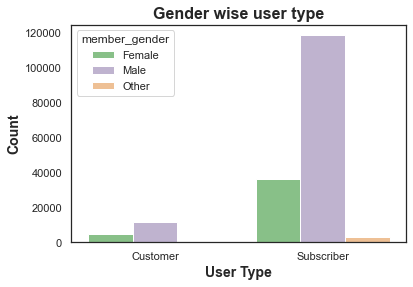

In [1061]:
sb.countplot(data = df, x = 'user_type', hue = 'member_gender', palette='Accent')
plt.xlabel('User Type',fontsize=14, fontweight='semibold');
plt.ylabel('Count',fontsize=14, fontweight='semibold');
plt.title('Gender wise user type',fontsize=16, fontweight='semibold');

##### There are mainly male bike riders in both Subscriber and Customer user type.

#### What is the duration of ride between different user types?

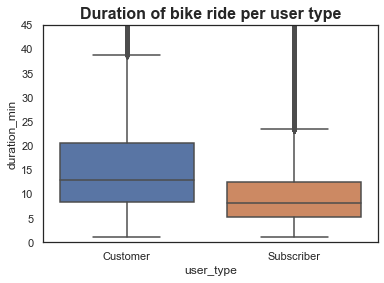

In [1062]:
sb.boxplot(data = df, x = 'user_type', y = 'duration_min', )
plt.ylim(0,45);
plt.title('Duration of bike ride per user type', fontsize=16, fontweight='semibold');

##### Subscribers' average trip duration is around 7 minutes. Customers' average trip duration is around 13 minutes.

#### Is the frequency of bike rentals for the Customers and Subscribers the same?

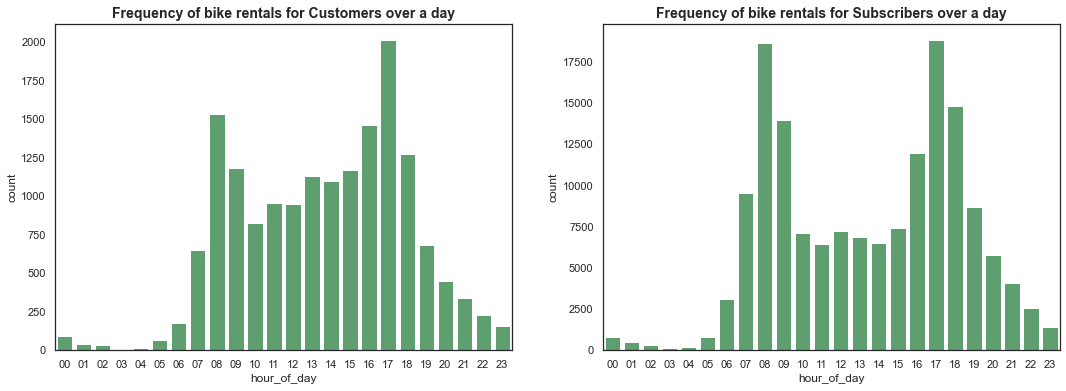

In [1063]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[18, 6])

sb.countplot(data = df[df.user_type=='Customer'], x = 'hour_of_day', ax=ax[0], color=sb.color_palette()[2])
sb.countplot(data = df[df.user_type=='Subscriber'], x = 'hour_of_day', ax=ax[1],  color=sb.color_palette()[2])

plt.sca(ax[0])
plt.title("Frequency of bike rentals for Customers over a day", fontsize=14, fontweight='semibold')
plt.sca(ax[1])
plt.title("Frequency of bike rentals for Subscribers over a day", fontsize=14, fontweight='semibold')

plt.show()

##### The bike rentals for customers peak during the evening 5:00 PM. But for the subscribers, it is between 7-9 AM and 4-6 PM that matches the hours of the office and school goers.

#### Is the frequency of rides the same across different genders?

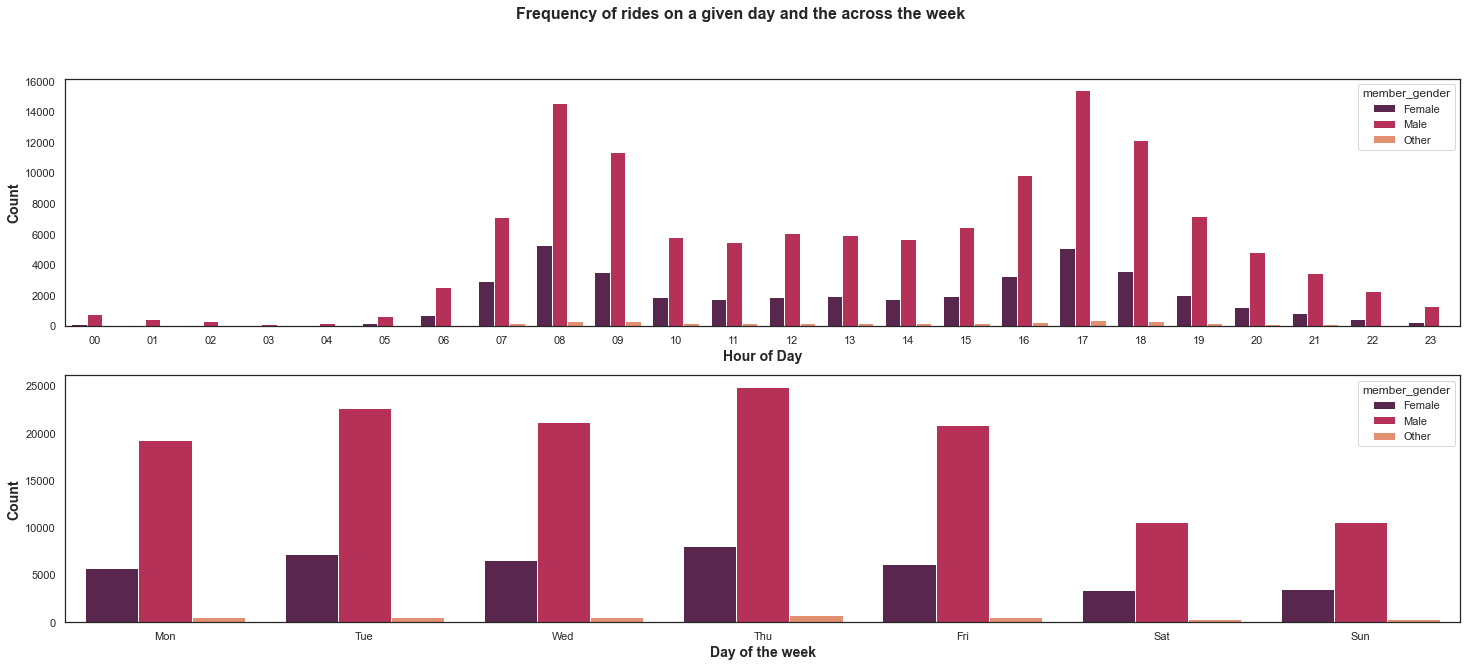

In [1064]:
plt.figure(figsize = [25, 10]);
plt.suptitle('Frequency of rides on a given day and the across the week', fontsize=16, fontweight='semibold');

ax = plt.subplot(2, 1, 1);
sb.countplot(data = df, x = 'hour_of_day', hue = 'member_gender', palette = 'rocket');
plt.xlabel('Hour of Day', fontsize=14, fontweight='semibold');
plt.ylabel('Count', fontsize=14, fontweight='semibold');

ax = plt.subplot(2, 1, 2);
sb.countplot(data = df, x = 'weekday', hue = 'member_gender', palette = 'rocket');
plt.xlabel('Day of the week', fontsize=14, fontweight='semibold');
plt.ylabel('Count', fontsize=14, fontweight='semibold');

##### Most of the bikers are male. Male and female riders tend to bike most on Thursdays.

#### What is the average duration of all bike rides during the week?

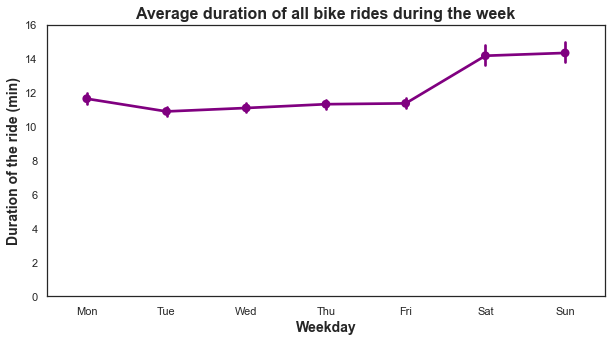

In [1065]:
plt.figure(figsize = [10, 5])
sb.pointplot(x='weekday', y='duration_min', color='purple', data=df);
plt.ylim(0,16);
plt.title('Average duration of all bike rides during the week', fontsize=16, fontweight='semibold')
plt.xlabel('Weekday', fontsize=14, fontweight='semibold')
plt.ylabel('Duration of the ride (min)', fontsize=14, fontweight='semibold');

##### The average duration of all bike rides is highest on Sunday.

#### Which are the top 5 bike rental places for Customer?

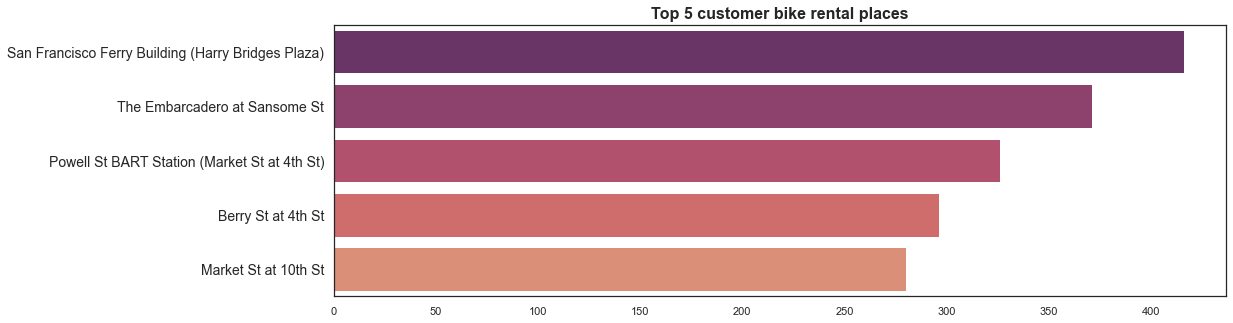

In [1066]:
df1 = df.query('user_type == "Customer"').start_station_name.value_counts()[:5]
plt.figure(figsize = [16, 5]);
sb.barplot(x=df1.values,y=df1.index, palette='flare_r');
plt.yticks(fontsize=14);
plt.title('Top 5 customer bike rental places', fontsize=16, fontweight='semibold');

#### As the top 5 bike rental places for Customer are either a plaza or street, Customers may be tourists who rent the bikes.

#### Which are the top 5 bike rental places for Subscriber?

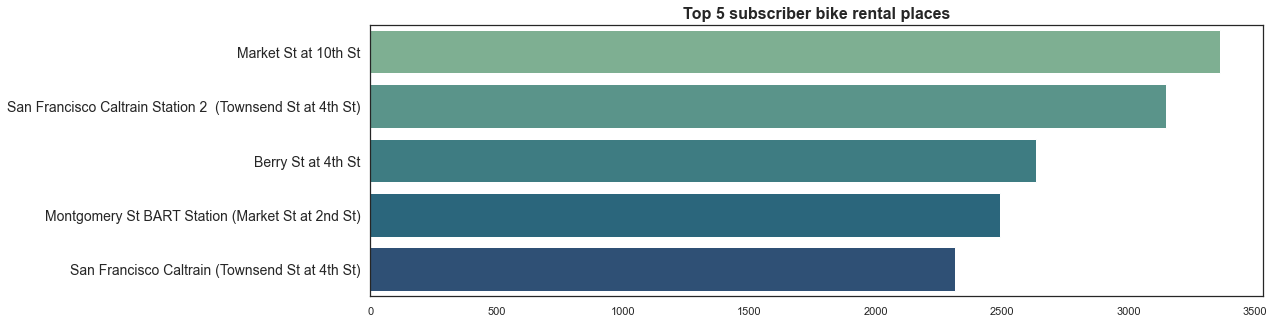

In [1067]:
df1=df[df.user_type == 'Subscriber'].start_station_name.value_counts()[:5]
plt.figure(figsize = [16, 5]);
sb.barplot(x=df1.values,y=df1.index, palette='crest');
plt.yticks(fontsize=14);
plt.title('Top 5 subscriber bike rental places', fontsize=16, fontweight='semibold');

#### As the top 5 bike rental places for Subscriber are many stations, the subscribers may be using the bikes to commute to different places from the station.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are some interesting observations 
> - There are mainly male bike riders in both Subscriber and Customer user type.
> - Subscribers' average trip duration is around 7 minutes. Customers' average trip duration is around 13 minutes.
> - The bike rentals for customers peak during the evening 5:00 PM. But for the subscribers, it is between 7-9 AM and 4-6 PM that matches the hours of the office and school goers.
> - Most of the bikers are male. Male and female riders tend to bike most on Thursdays.
> - The average duration of all bike rides is highest on Sunday.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - As the top 5 bike rental places for Customer are either a plaza or street, Customers may be tourists who rent the bikes.
> - As the top 5 bike rental places for Subscriber are many stations, the subscribers may be using the bikes to commute to different places from the station.


### Multivariate exploration <a name="multivariate"></a>

#### What is the duration of the rides among different users?

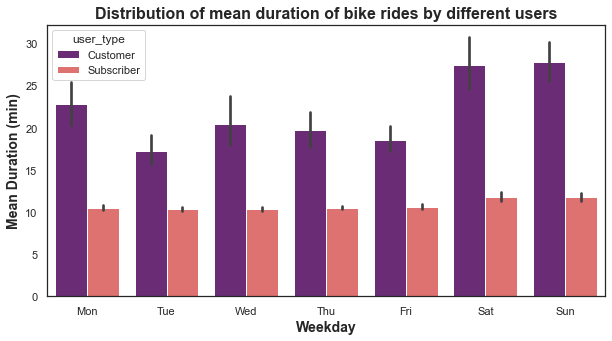

In [1068]:
plt.figure(figsize = [10, 5])
sb.barplot(data = df, x = 'weekday', y = 'duration_min', hue = 'user_type', palette='magma')
plt.xlabel('Weekday',fontsize=14, fontweight='semibold')
plt.ylabel('Mean Duration (min)',fontsize=14, fontweight='semibold')
plt.title("Distribution of mean duration of bike rides by different users", fontsize=16, fontweight='semibold');

##### Customers duration of riding bike is much more than subscribers. It is more during weekends.

#### What is the duration of the rides among different genders?

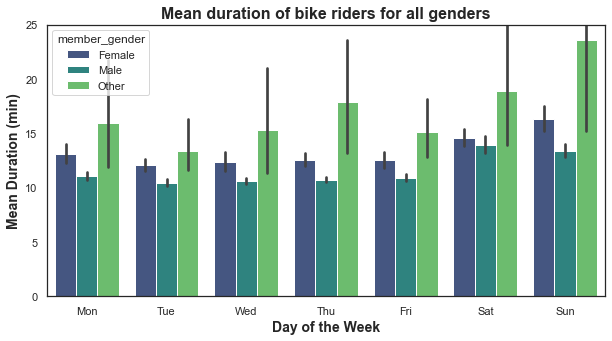

In [1069]:
plt.figure(figsize = [10, 5])
sb.barplot(data = df, x = 'weekday', y = 'duration_min', hue = 'member_gender', palette='viridis')
plt.ylim(0,25);
plt.xlabel('Day of the Week',fontsize=14, fontweight='semibold')
plt.ylabel('Mean Duration (min)', fontsize=14, fontweight='semibold')
plt.title("Mean duration of bike riders for all genders", fontsize=16, fontweight='semibold');

##### Female and other gender bike riders tend to ride longer than male riders and the duration is higher during weekends.

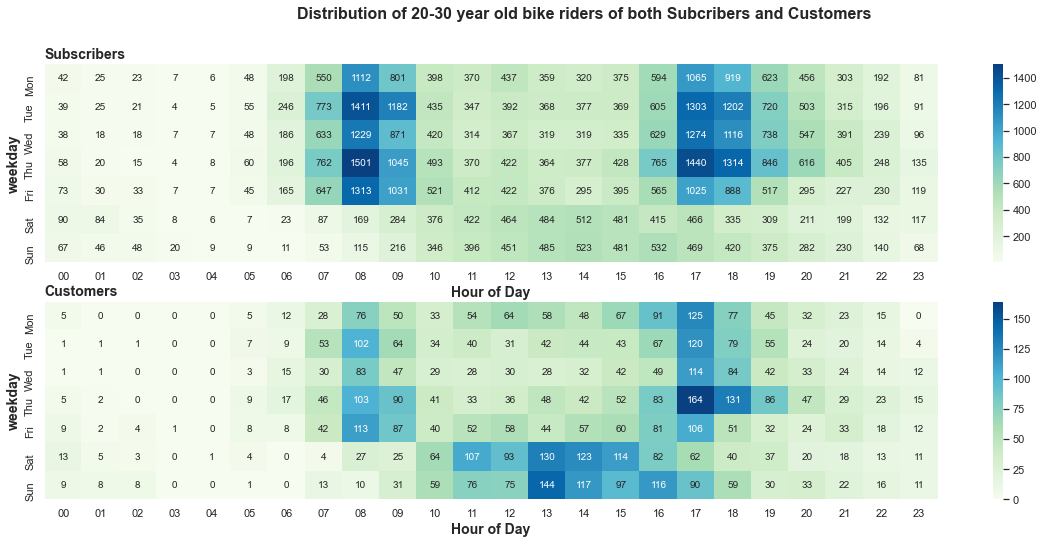

In [1070]:
plt.figure(figsize = (20,8))
plt.suptitle('Distribution of 20-30 year old bike riders of both Subcribers and Customers', fontsize=16,fontweight='semibold')

plt.subplot(2, 1, 1)
df1 = df[(df['member_age'] > 20) & (df['member_age'] <= 30) & (df['user_type'] == 'Subscriber')]
subscribers = df1.groupby(['weekday', 'hour_of_day']).size().reset_index(name = 'count')
count_s = subscribers.pivot(index = 'weekday', columns = 'hour_of_day', values = 'count')
sb.heatmap(count_s, cmap='GnBu',annot=True, fmt='d');
plt.title('Subscribers', loc='left',fontsize=14, fontweight='semibold');
plt.xlabel('Hour of Day',fontsize=14, fontweight='semibold');
plt.ylabel('weekday',fontsize=14, fontweight='semibold');

plt.subplot(2, 1, 2)
df1 = df[(df['member_age'] > 20) & (df['member_age'] <= 30) & (df['user_type'] == 'Customer')]
customers = df1.groupby(['weekday', 'hour_of_day']).size().reset_index(name = 'count')
count_c = customers.pivot(index = 'weekday', columns = 'hour_of_day', values = 'count')
sb.heatmap(count_c, cmap='GnBu', annot=True, fmt='d');
plt.title('Customers', loc='left',fontsize=14, fontweight='semibold');
plt.xlabel('Hour of Day',fontsize=14, fontweight='semibold');
plt.ylabel('weekday',fontsize=14, fontweight='semibold');

##### 20 - 30 year old age bracket:

##### Subscribers predominantly use the bikes during 7-9 AM and 4-6 PM on weekdays. There are few riders on weekend. Customers use the bikers more during 4-6 PM on weekdays and they ride more during the weekends.

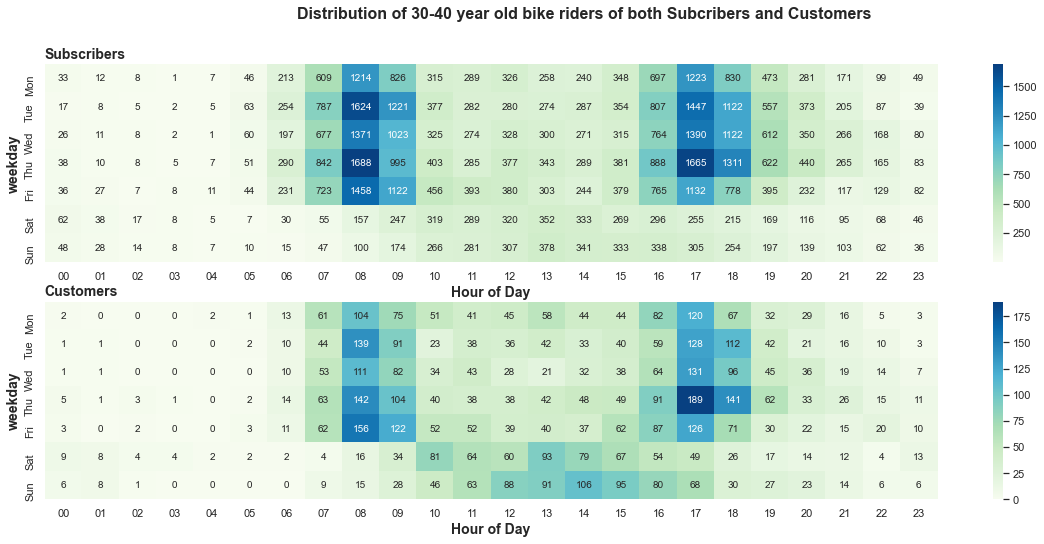

In [1071]:
plt.figure(figsize = (20,8))
plt.suptitle('Distribution of 30-40 year old bike riders of both Subcribers and Customers', fontsize=16,fontweight='semibold')
plt.subplot(2, 1, 1)
df1 = df[(df['member_age'] > 30) & (df['member_age'] <= 40) & (df['user_type'] == 'Subscriber')]
subscribers = df1.groupby(['weekday', 'hour_of_day']).size().reset_index(name = 'count')
count_s = subscribers.pivot(index = 'weekday', columns = 'hour_of_day', values = 'count')
sb.heatmap(count_s, cmap='GnBu',annot=True, fmt='d');
plt.title('Subscribers', loc='left',fontsize=14, fontweight='semibold');
plt.xlabel('Hour of Day',fontsize=14, fontweight='semibold');
plt.ylabel('weekday',fontsize=14, fontweight='semibold');

plt.subplot(2, 1, 2)
df1 = df[(df['member_age'] > 30) & (df['member_age'] <= 40) & (df['user_type'] == 'Customer')]
customers = df1.groupby(['weekday', 'hour_of_day']).size().reset_index(name = 'count')
count_c = customers.pivot(index = 'weekday', columns = 'hour_of_day', values = 'count')
sb.heatmap(count_c, cmap='GnBu', annot=True, fmt='d');
plt.title('Customers', loc='left',fontsize=14, fontweight='semibold');
plt.xlabel('Hour of Day', fontsize=14, fontweight='semibold');
plt.ylabel('weekday',fontsize=14, fontweight='semibold');

#### 30 - 40 year old age bracket:

#### Subscribers use the bikes during 7-9 AM and 4-6 PM on weekdays.  Customers use bikes equally between 7-9 AM and 4-6 PM on weekdays and there are far fewer riders on weekends for this age group. Frequency is higher between 12-3 PM. 

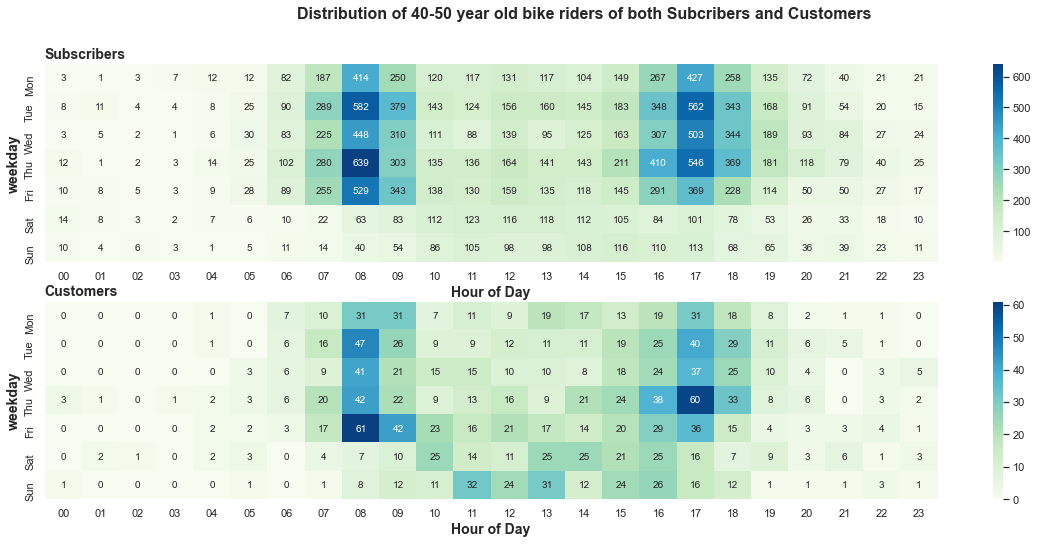

In [1072]:
plt.figure(figsize = (20,8))
plt.suptitle('Distribution of 40-50 year old bike riders of both Subcribers and Customers', fontsize=16,fontweight='semibold')

plt.subplot(2, 1, 1)
df1 = df[(df['member_age'] > 40) & (df['member_age'] <= 50) & (df['user_type'] == 'Subscriber')]
subscribers = df1.groupby(['weekday', 'hour_of_day']).size().reset_index(name = 'count')
count_s = subscribers.pivot(index = 'weekday', columns = 'hour_of_day', values = 'count')
sb.heatmap(count_s, cmap='GnBu',annot=True, fmt='d');
plt.title('Subscribers', loc='left', fontsize=14, fontweight='semibold');
plt.xlabel('Hour of Day',fontsize=14, fontweight='semibold');
plt.ylabel('weekday',fontsize=14, fontweight='semibold');

plt.subplot(2, 1, 2)
df1 = df[(df['member_age'] > 40) & (df['member_age'] <= 50) & (df['user_type'] == 'Customer')]
customers = df1.groupby(['weekday', 'hour_of_day']).size().reset_index(name = 'count')
count_c = customers.pivot(index = 'weekday', columns = 'hour_of_day', values = 'count')
sb.heatmap(count_c, cmap='GnBu', annot=True, fmt='d');
plt.title('Customers', loc='left',fontsize=14, fontweight='semibold');
plt.xlabel('Hour of Day',fontsize=14, fontweight='semibold');
plt.ylabel('weekday',fontsize=14, fontweight='semibold');

##### 40 - 50 year old age bracket:

##### There are fewer riders in this age group in both user types. 

##### Subscribers use the bikes during 7-9 AM and 4-6 PM on weekdays.  Customers use bikes equally between 7-9 AM and 3-6 PM on weekdays. There are more riders on Sunday 11 AM - 4 PM.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - Among all the age brackets, Subscribers and customers rent the bikes around 7-9 AM and 4-6 PM on weekdays.  Subscribers use more on weekdays and the customers more on the weekends. 20-30 year members rent the bikes the most. 


#### Were there any interesting or surprising interactions between features?

> - Customers duration of riding bike is much more than subscribers. It is more during weekends.
> - Female and other gender bike riders tend to ride longer than male riders and the duration is higher during weekends.

### Conclusions <a name="conclusions"></a>

> Subscribers are main users of the service than Customers. Male riders use the service the most. People tend to use bikes most on the weekdays and predominantly on Thursday and the frequency of rides reduces during weekend.Most of the riders are between 25-35 years old. There are far fewer riders over the age 40 years. Most of the rides are during 7-9 AM and 4-6 PM. Customers trip duration is more than subscribers and the duration is highest on Sundays. Female and other gender bike riders tend to ride longer than male riders and the duration is higher during weekends.

### References <a name="references"></a>

> - 1) https://knowledge.udacity.com/
> - 2) https://seaborn.pydata.org/tutorial/color_palettes.html
> - 3) https://seaborn.pydata.org/generated/seaborn.heatmap.html
> - 4) http://seaborn.pydata.org/generated/seaborn.countplot.html